# Contents

### 01. Import Libraries and Data
### 02. Creating Visualizations
### 03. Exporting Visualizations

# 01. Import Libraries and Data

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Assign path to str
path = r'/Users/allyfornino/Documents/10-2022 Instacart Basket Analysis/'

In [4]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_custs.pkl'))

In [5]:
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,first_name,last_name,gender,state,age,date_joined,num_dependents,marital_status,income,_merge
0,2539329,1,1,2,8,NaN,True,196,1,0,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,False,196,1,1,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


In [6]:
df.shape

(32404859, 32)

# 02. Creating Visualizations

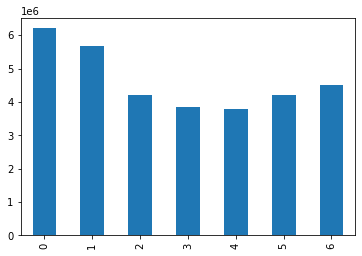

In [7]:
# Creating a bar chart for number of orders each day
bar = df['order_day_of_week'].value_counts().sort_index().plot.bar()

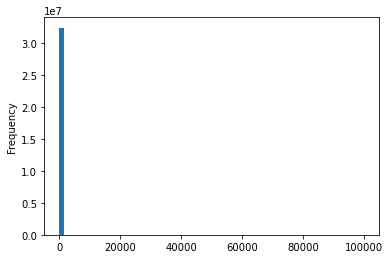

In [8]:
# Creating a histogram for frequency of prices
hist = df['prices'].plot.hist(bins = 70)

In [9]:
df.loc[df['prices'] > 100, 'prices'] = np.nan

In [10]:
df['prices'].max()

25.0

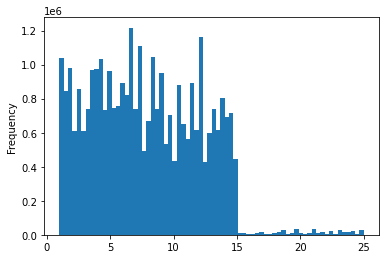

In [11]:
hist = df['prices'].plot.hist(bins = 70)

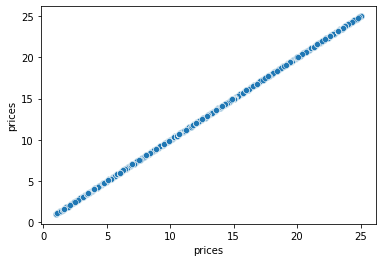

In [12]:
# Creating a scatterplot
scatter = sns.scatterplot(x = 'prices', y = 'prices', data = df)

In [13]:
# Creating a line chart using subset

In [14]:
# Create a list holding true/flase values to test np.random.rand() <= 0.7
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [15]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [16]:
# Store 70% of sample in df big and 30% in df small
big = df[dev]
small = df[~dev]

In [17]:
# Checking length is correct
len(big) + len(small)

32404859

In [18]:
# Creating new df with only the columns needed for line chart
df_small = small[['order_day_of_week', 'prices']]

In [19]:
df_small

,order_day_of_week,prices
0,2,9.0
2,3,9.0
3,4,9.0
6,1,9.0
10,2,12.5
...,...,...
32404841,2,10.7
32404842,6,10.7
32404843,0,10.7
32404849,1,10.7


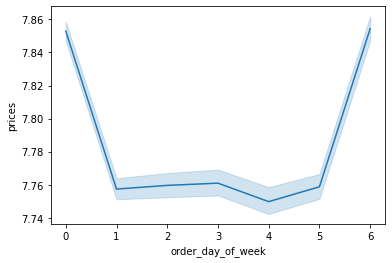

In [20]:
line = sns.lineplot(data = df_small, x = 'order_day_of_week', y = 'prices')

### Histogram for 'order_hour_of_day' column

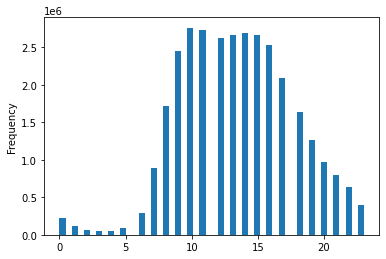

In [21]:
hist2 = df['order_hour_of_day'].plot.hist(bins = 50)

#### Most orders are placed between 10 and 11 am. Orders remain steady throughout the afternoon before dropping around after 5 pm. Only a few orders are placed between 12 am and 7 am.

### Bar chart for loyalty_flag column

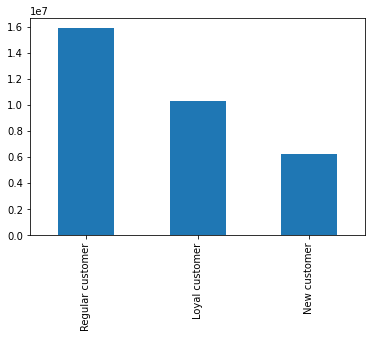

In [22]:
bar2 = df['loyalty_flag'].value_counts().plot.bar()

#### The majority of customers are 'regular' customers, meaning they have placed between 10 and 40 orders.

### Line chart for expenditure by hour

In [22]:
df_small2 = small[['order_hour_of_day', 'prices']]

In [23]:
df_small2

,order_hour_of_day,prices
0,8,9.0
2,12,9.0
3,7,9.0
6,9,9.0
10,8,12.5
...,...,...
32404841,12,10.7
32404842,3,10.7
32404843,1,10.7
32404849,18,10.7


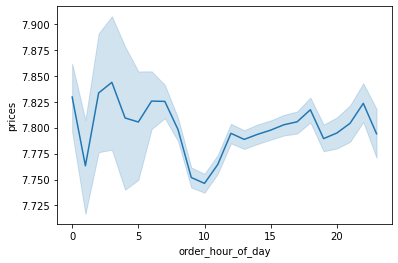

In [24]:
line2 = sns.lineplot(data = df_small2, x = 'order_hour_of_day', y = 'prices')

#### Despite the fewer number of orders placed in the early morning, the prices are much higher during this time. Expenditure decreases heavily around 9 am - 12 pm, although the majority of orders are placed at this time. 

### Line chart for age and family situation

In [25]:
df_small3 = small[['age', 'num_dependents']]

In [26]:
df_small3

,age,num_dependents
0,31,3
2,31,3
3,31,3
6,31,3
10,31,3
...,...,...
32404841,25,0
32404842,25,0
32404843,25,0
32404849,25,0


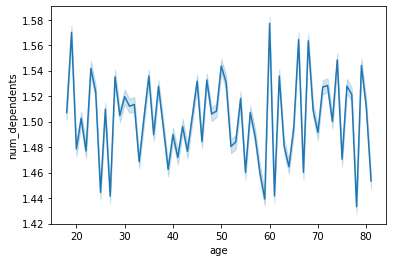

In [27]:
line3 = sns.lineplot(data = df_small3, x = 'age', y = 'num_dependents')

#### There is not a clear trend of number of dependents based on age for the customer base.

### Scatterplot of age and spending power

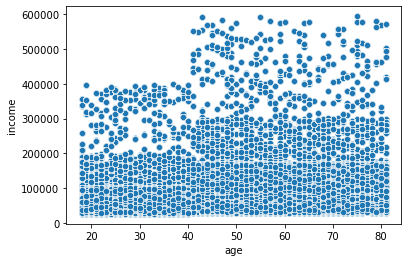

In [28]:
scatter2 = sns.scatterplot(x = 'age', y = 'income', data = df)

#### The majority of customers aged under 40 have an income equal to or less than 200k USD. Most customers in the 40+ age group have an income equal to or less than 300k USD, but the concentration of customers is still higher in the 0-200k USD income bracket. The spending power of customers is higher in the older age groups, but there are some younger customers that make more (300-400k) than the majority of older customers.

# 03. Exporting Visualizations

In [29]:
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_orders_dow.png'))

In [30]:
hist.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_expenditure.png'))

In [31]:
hist2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_exp_hour_of_day.png'))

In [32]:
scatter.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter_prices.png'))

In [33]:
line.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_dow_prices.png'))

In [34]:
bar2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyalty_flag.png'))

In [35]:
line2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_hour_prices.png'))

In [36]:
line3.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'line_age_num_dependents.png'))

In [37]:
scatter2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'age_income.png'))